In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

C:\Users\GARV AGGARWAL\AppData\Local\Temp\ipykernel_11316\130313570.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data=pd.read_csv('breast_cancer.csv')

In [3]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [4]:
data.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [5]:
data['Class'].value_counts()

Class
2    444
4    239
Name: count, dtype: int64

In [6]:
data['Class']=data['Class'].replace(2,0)
data['Class']=data['Class'].replace(4,1)

In [7]:
data['Class'].value_counts()

Class
0    444
1    239
Name: count, dtype: int64

In [8]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [9]:
datatype=data.dtypes
print(datatype)
data.astype('float')

Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,0.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,0.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,0.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,0.0
679,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0
680,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,1.0
681,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0,1.0


In [10]:
# data=(data-data.mean())/data.std()
label=data['Class']
data=data.drop('Class',axis=1)

data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [11]:
label=label.values
data=data.values

print(label.shape,data.shape)

(683,) (683, 9)


In [12]:
split=0.8

train_x=data[:int(split*data.shape[0])] 
train_y=label[:int(split*label.shape[0])]

test_x=data[int(split*data.shape[0]):]
test_y=label[int(split*label.shape[0]):]

ones=np.ones((train_x.shape[0],1))
train_x=np.hstack((ones,train_x))

ones=np.ones((test_x.shape[0],1))
test_x=np.hstack((ones,test_x))

print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(546, 10) (546,) (137, 10) (137,)


In [13]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [14]:
def hypothesis(x,w):
    return sigmoid(np.dot(x,w))

In [15]:
def loss_function(x,y,w):
    hyp_th=hypothesis(x,w)
    loss = -1.0*np.mean((y*np.log(hyp_th) + ((1-y)*np.log(1-hyp_th))))
    return loss

In [16]:
def gradient(x,y,w):
    hyp_th=hypothesis(x,w)
    grad=np.dot(x.T,(y-hyp_th))
    return grad/x.shape[0]

In [17]:
def gradient_descent(x,y):
    lr=0.3
    epochs=2000
    loss=[]
    w=np.zeros((x.shape[1],))
    for i in range(epochs):
        grad=gradient(x,y,w)
        loss.append(loss_function(x,y,w))
        # print("Epoch %d: Loss %f"%(i, loss[i]))
        w=w+lr*grad
    return w,loss

In [18]:
w,loss=gradient_descent(train_x,train_y)

C:\Users\GARV AGGARWAL\AppData\Local\Temp\ipykernel_11316\1634299663.py:3: RuntimeWarning: divide by zero encountered in log
  loss = -1.0*np.mean((y*np.log(hyp_th) + ((1-y)*np.log(1-hyp_th))))
C:\Users\GARV AGGARWAL\AppData\Local\Temp\ipykernel_11316\1634299663.py:3: RuntimeWarning: invalid value encountered in multiply
  loss = -1.0*np.mean((y*np.log(hyp_th) + ((1-y)*np.log(1-hyp_th))))


In [19]:
print(w)

[-8.07042822  0.42938211 -0.03060904  0.32956803  0.25346451  0.0866809
  0.35620428  0.2736804   0.18311191  0.35790733]


[0.6931471805599453, 1.5937994789673484, 2.390450273786709, nan, 1.2892227930168283, 1.1940469834235956, nan, 0.5910517346672316, 0.5409297171008329, 0.8709422357485406, 0.5369459139469825, 0.8162885030414466, 0.48178580942249777, 0.6355717523475306, 0.440437712640812, 0.5340345920411983, 0.41557365412098785, 0.4858462905560206, 0.39942614076760485, 0.46043284436099485, 0.38799224969769625, 0.44552244986363027, 0.3791960303427053, 0.43562575930393116, 0.3717832802812192, 0.4277803067247196, 0.3649931418491602, 0.420370342335168, 0.3584324310852021, 0.41270136126055934, 0.3519637090283191, 0.40467140461947515, 0.34558924556659143, 0.3964603518936565, 0.33936025331428243, 0.38830544575450254, 0.33332592529266586, 0.3803902781127, 0.3275149891243697, 0.37281760378788104, 0.32193527771817754, 0.3656228534026788, 0.3165799622765567, 0.35879847021508854, 0.3114343896076556, 0.3523152334396207, 0.30648124001102744, 0.3461367060380864, 0.3017036539862938, 0.34022734095450413, 0.297086727271061

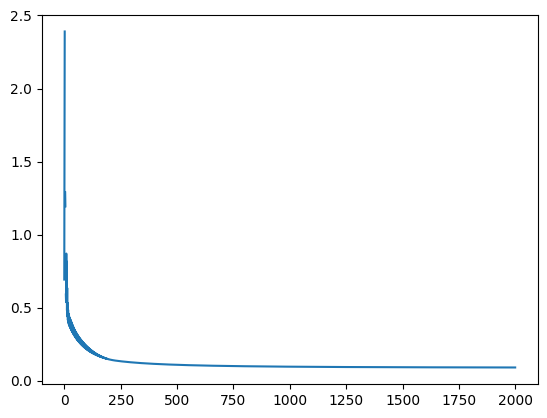

In [20]:
print(loss)
plt.plot(loss)

In [21]:
def accuracy(data, label):
    correct = 0
    for i in range(data.shape[0]):
        pred = hypothesis(data[i], w)
        if pred >= 0.5:
            pred = 1
        else:
            pred = 0
        print(label[i])
        if pred == label[i]:
            correct += 1
    return correct/data.shape[0]

print(accuracy(test_x, test_y))

0
0
0
0
1
0
0
1
1
1
1
0
0
1
0
0
0
0
0
0
1
1
0
0
0
1
0
1
0
1
1
1
0
1
0
0
0
0
0
0
0
0
1
1
1
0
0
1
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
1
1.0
